In [72]:
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt
%matplotlib inline

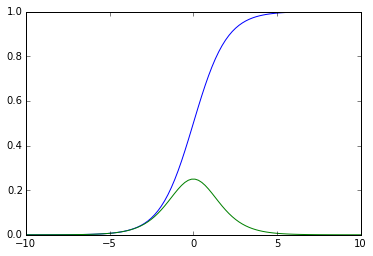

In [73]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def elementwise_grad(fun):      # A wrapper for broadcasting
     return grad(lambda x: np.sum(fun(x)))


x = np.linspace(-10,10,100)
y = sigmoid(x)
dy = elementwise_grad(sigmoid)

plt.plot(x,y,x,dy(x))

In [85]:
class RNN():
    def __init__(self,size,fn = sigmoid):
        self.weights = np.random.standard_normal((size,size))
        self.biases = np.ones(size)
        self.states = np.zeros(size)
        
        self.act_fn = fn
        
    def forward(self):
        self.states = self.act_fn(np.dot(self.states,self.weights) + self.biases)
    
    def run(self,x):
        t = len(x)
        result = np.zeros(t)
        for i in range(t):
            self.states[0] = x[i]
            self.forward()
            result[i] = self.states[-1]
        return result

In [87]:
A = RNN(4)
x = np.zeros(5)
print(A.run(x))

[ 0.73105858  0.60010995  0.6738564   0.65827032  0.66464194]


In [88]:
#Some toy data
def fibonacci(start, length):
    result = [None]*length
    t1 = start
    t2 = start
    for i in range(length):
        result[i] = t1 + t2
        t2 = t1
        t1 = result[i]
    return result

print(fibonacci(5,6))
print(fibonacci(1,10))

[10, 15, 25, 40, 65, 105]
[2, 3, 5, 8, 13, 21, 34, 55, 89, 144]


In [89]:
def loss(x,T):
    y = A.run(x)
    return ((y-T)**2)/2
    
x = np.zeros(5)
T = fibonacci(1,5)
loss(x,T)

array([  0.89367166,   2.72936969,   9.40276871,  26.91205338,  76.09466313])

In [92]:

A = RNN(4)
x = np.zeros(5)
print(A.run(x))
dd = elementwise_grad(A.run)
dd(x)

[ 0.73105858  0.61461139  0.66928463  0.64980525  0.65436363]


TypeError: float() argument must be a string or a number, not 'FloatNode'

In [71]:
dl = grad(loss)
dl(x,T)



TypeError: float() argument must be a string or a number, not 'FloatNode'